### Urban Air Pollution

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
train_ds = pd.read_csv("train.csv")
train_ds.head()

,Place_ID X Date,Date,Place_ID,target,target_min,target_max,target_variance,target_count,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,...,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle,L3_SO2_solar_zenith_angle,L3_CH4_CH4_column_volume_mixing_ratio_dry_air,L3_CH4_aerosol_height,L3_CH4_aerosol_optical_depth,L3_CH4_sensor_azimuth_angle,L3_CH4_sensor_zenith_angle,L3_CH4_solar_azimuth_angle,L3_CH4_solar_zenith_angle
0,010Q650 X 2020-01-02,2020-01-02,010Q650,38.0,23.0,53.0,769.50,92,11.000000,60.200001,...,38.593017,-61.752587,22.363665,1793.793579,3227.855469,0.010579,74.481049,37.501499,-62.142639,22.545118
1,010Q650 X 2020-01-03,2020-01-03,010Q650,39.0,25.0,63.0,1319.85,91,14.600000,48.799999,...,59.624912,-67.693509,28.614804,1789.960449,3384.226562,0.015104,75.630043,55.657486,-53.868134,19.293652
2,010Q650 X 2020-01-04,2020-01-04,010Q650,24.0,8.0,56.0,1181.96,96,16.400000,33.400002,...,49.839714,-78.342701,34.296977,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,010Q650 X 2020-01-05,2020-01-05,010Q650,49.0,10.0,55.0,1113.67,96,6.911948,21.300001,...,29.181258,-73.896588,30.545446,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,010Q650 X 2020-01-06,2020-01-06,010Q650,21.0,9.0,52.0,1164.82,95,13.900001,44.700001,...,0.797294,-68.612480,26.899694,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
test_ds = pd.read_csv("test.csv")
train_ds.head()

,Place_ID X Date,Date,Place_ID,target,target_min,target_max,target_variance,target_count,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,...,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle,L3_SO2_solar_zenith_angle,L3_CH4_CH4_column_volume_mixing_ratio_dry_air,L3_CH4_aerosol_height,L3_CH4_aerosol_optical_depth,L3_CH4_sensor_azimuth_angle,L3_CH4_sensor_zenith_angle,L3_CH4_solar_azimuth_angle,L3_CH4_solar_zenith_angle
0,010Q650 X 2020-01-02,2020-01-02,010Q650,38.0,23.0,53.0,769.50,92,11.000000,60.200001,...,38.593017,-61.752587,22.363665,1793.793579,3227.855469,0.010579,74.481049,37.501499,-62.142639,22.545118
1,010Q650 X 2020-01-03,2020-01-03,010Q650,39.0,25.0,63.0,1319.85,91,14.600000,48.799999,...,59.624912,-67.693509,28.614804,1789.960449,3384.226562,0.015104,75.630043,55.657486,-53.868134,19.293652
2,010Q650 X 2020-01-04,2020-01-04,010Q650,24.0,8.0,56.0,1181.96,96,16.400000,33.400002,...,49.839714,-78.342701,34.296977,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,010Q650 X 2020-01-05,2020-01-05,010Q650,49.0,10.0,55.0,1113.67,96,6.911948,21.300001,...,29.181258,-73.896588,30.545446,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,010Q650 X 2020-01-06,2020-01-06,010Q650,21.0,9.0,52.0,1164.82,95,13.900001,44.700001,...,0.797294,-68.612480,26.899694,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
train_ds.describe()

,target,target_min,target_max,target_variance,target_count,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,...,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle,L3_SO2_solar_zenith_angle,L3_CH4_CH4_column_volume_mixing_ratio_dry_air,L3_CH4_aerosol_height,L3_CH4_aerosol_optical_depth,L3_CH4_sensor_azimuth_angle,L3_CH4_sensor_zenith_angle,L3_CH4_solar_azimuth_angle,L3_CH4_solar_zenith_angle
count,30557.000000,30557.000000,30557.000000,3.055700e+04,30557.000000,30557.000000,30557.000000,30557.000000,30557.000000,30557.000000,...,23320.000000,23320.000000,23320.000000,5792.000000,5792.000000,5792.000000,5792.000000,5792.000000,5792.000000,5792.000000
mean,61.148045,29.025866,117.992234,7.983756e+03,125.831135,15.302326,70.552747,0.006004,9.321342,0.416886,...,35.590916,-123.697777,46.533951,923.231949,1711.793613,0.016227,1.254703,13.849040,-69.098594,23.100630
std,46.861309,33.119775,100.417713,4.863090e+04,146.581856,10.688573,18.807884,0.003787,9.343226,2.707990,...,18.955228,71.916036,14.594267,929.633988,1741.299304,0.027016,55.101250,18.004375,84.702355,24.786350
min,1.000000,1.000000,1.000000,0.000000e+00,2.000000,0.420044,5.128572,0.000139,-34.647879,-15.559646,...,0.000000,-179.880630,0.000000,0.000000,0.000000,0.000000,-105.367363,0.000000,-179.947422,0.000000
25%,25.000000,5.000000,60.000000,1.064920e+03,44.000000,7.666667,58.600002,0.003403,3.123071,-1.097864,...,19.451524,-165.882624,36.693094,0.000000,0.000000,0.000000,0.000000,0.000000,-161.726937,0.000000
50%,50.000000,15.000000,91.000000,2.395350e+03,72.000000,12.200000,74.099998,0.004912,8.478424,0.222092,...,37.918838,-156.637162,47.445010,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,80.000000,44.000000,155.000000,5.882550e+03,150.000000,19.900000,85.450001,0.007562,16.201563,1.772925,...,52.270055,-118.453598,57.438181,1861.674119,3393.541633,0.023829,62.245728,27.412303,0.000000,47.090635
max,815.000000,438.000000,999.000000,1.841490e+06,1552.000000,72.599998,100.000000,0.021615,37.437921,17.955124,...,66.111289,179.776125,79.631711,2112.522949,6478.550544,0.210483,77.355232,59.972710,179.813344,69.992363


In [5]:
test_ds.describe()

,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,L3_NO2_NO2_column_number_density,L3_NO2_NO2_slant_column_number_density,L3_NO2_absorbing_aerosol_index,L3_NO2_cloud_fraction,...,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle,L3_SO2_solar_zenith_angle,L3_CH4_CH4_column_volume_mixing_ratio_dry_air,L3_CH4_aerosol_height,L3_CH4_aerosol_optical_depth,L3_CH4_sensor_azimuth_angle,L3_CH4_sensor_zenith_angle,L3_CH4_solar_azimuth_angle,L3_CH4_solar_zenith_angle
count,16136.000000,16136.000000,16136.000000,16136.000000,16136.000000,16136.000000,14809.000000,14809.000000,14809.000000,14809.000000,...,11963.000000,11963.000000,11963.000000,3115.000000,3115.000000,3115.000000,3115.000000,3115.000000,3115.000000,3115.000000
mean,14.202076,71.136312,0.005513,8.651834,0.660754,0.113826,0.000098,0.000166,-1.089137,0.293308,...,34.894186,-122.992436,49.048986,945.230960,1766.062448,0.018122,0.587431,14.053838,-71.287981,24.113993
std,9.377060,18.357542,0.003261,8.033144,2.854376,2.914895,0.000084,0.000101,0.616871,0.306695,...,18.808611,76.258227,13.809821,930.249966,1755.875373,0.029822,55.802139,18.085361,87.392331,25.099069
min,0.900000,6.700000,0.000279,-26.628958,-15.837668,-14.043520,-0.000031,0.000000,-3.495448,0.000000,...,0.000000,-179.953644,0.000000,0.000000,0.000000,0.000000,-105.016572,0.000000,-179.924887,0.000000
25%,7.655303,60.000000,0.003401,3.201305,-1.040559,-1.590374,0.000059,0.000127,-1.525122,0.029981,...,18.517603,-166.951551,40.406972,0.000000,0.000000,0.000000,0.000000,0.000000,-163.013042,0.000000
50%,11.600000,74.800003,0.004610,7.482545,0.402638,0.043358,0.000079,0.000154,-1.172175,0.172885,...,36.782582,-158.740565,50.105448,1771.898988,2943.639456,0.003386,0.000000,1.538256,0.000000,21.074167
75%,18.100000,85.500000,0.006598,13.834132,2.167810,1.708833,0.000115,0.000191,-0.721279,0.500543,...,51.485177,-124.569494,59.020340,1863.157119,3424.017252,0.025774,62.156588,27.354263,0.000000,48.395878
max,63.100002,100.000000,0.020180,34.851022,19.889325,16.682952,0.001233,0.001343,5.196880,1.000000,...,66.216644,179.884901,79.647072,1992.809481,6196.581543,0.215117,75.897305,59.984665,179.955138,69.925462


In [6]:
train_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30557 entries, 0 to 30556
Data columns (total 82 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Place_ID X Date                                      30557 non-null  object 
 1   Date                                                 30557 non-null  object 
 2   Place_ID                                             30557 non-null  object 
 3   target                                               30557 non-null  float64
 4   target_min                                           30557 non-null  float64
 5   target_max                                           30557 non-null  float64
 6   target_variance                                      30557 non-null  float64
 7   target_count                                         30557 non-null  int64  
 8   precipitable_water_entire_atmosphere                 30557 non-nul

In [7]:
train_ds.isnull()

,Place_ID X Date,Date,Place_ID,target,target_min,target_max,target_variance,target_count,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,...,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle,L3_SO2_solar_zenith_angle,L3_CH4_CH4_column_volume_mixing_ratio_dry_air,L3_CH4_aerosol_height,L3_CH4_aerosol_optical_depth,L3_CH4_sensor_azimuth_angle,L3_CH4_sensor_zenith_angle,L3_CH4_solar_azimuth_angle,L3_CH4_solar_zenith_angle
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,True,True,True,True,True,True
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,True,True,True,True,True,True
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30552,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,True,True,True,True,True,True
30553,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
30554,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,True,True,True,True,True,True
30555,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,True,True,True,True,True,True


In [29]:
test_ds.isnull()

,Place_ID X Date,Date,Place_ID,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,L3_NO2_NO2_column_number_density,...,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle,L3_SO2_solar_zenith_angle,L3_CH4_CH4_column_volume_mixing_ratio_dry_air,L3_CH4_aerosol_height,L3_CH4_aerosol_optical_depth,L3_CH4_sensor_azimuth_angle,L3_CH4_sensor_zenith_angle,L3_CH4_solar_azimuth_angle,L3_CH4_solar_zenith_angle
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16131,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
16132,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
16133,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
16134,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [10]:
train_ds.isnull().sum()

Place_ID X Date                     0
Date                                0
Place_ID                            0
target                              0
target_min                          0
                                ...  
L3_CH4_aerosol_optical_depth    24765
L3_CH4_sensor_azimuth_angle     24765
L3_CH4_sensor_zenith_angle      24765
L3_CH4_solar_azimuth_angle      24765
L3_CH4_solar_zenith_angle       24765
Length: 82, dtype: int64

### Encoding Values

In [11]:
from sklearn.preprocessing import LabelEncoder

### Working with Null values

In [12]:
train_ds['L3_CH4_aerosol_optical_depth'] = train_ds['L3_CH4_aerosol_optical_depth'].fillna(train_ds['L3_CH4_aerosol_optical_depth'].mean())
train_ds['L3_CH4_sensor_azimuth_angle'] = train_ds['L3_CH4_sensor_azimuth_angle'].fillna(train_ds['L3_CH4_sensor_azimuth_angle'].mean())
train_ds['L3_CH4_sensor_zenith_angle'] = train_ds['L3_CH4_sensor_zenith_angle'].fillna(train_ds['L3_CH4_sensor_zenith_angle'].mean())
train_ds['L3_CH4_solar_azimuth_angle'] = train_ds['L3_CH4_solar_azimuth_angle'].fillna(train_ds['L3_CH4_solar_azimuth_angle'].mean())
train_ds['L3_CH4_solar_zenith_angle'] = train_ds['L3_CH4_solar_zenith_angle'].fillna(train_ds['L3_CH4_solar_zenith_angle'].mean())
train_ds['L3_CH4_aerosol_height'] = train_ds['L3_CH4_aerosol_height'].fillna(train_ds['L3_CH4_aerosol_height'].mean())
train_ds['L3_CH4_CH4_column_volume_mixing_ratio_dry_air'] = train_ds['L3_CH4_CH4_column_volume_mixing_ratio_dry_air'].fillna(train_ds['L3_CH4_CH4_column_volume_mixing_ratio_dry_air'].mean())
train_ds['L3_CH4_aerosol_height'] = train_ds['L3_CH4_aerosol_height'].fillna(train_ds['L3_CH4_aerosol_height'].mean())
train_ds['precipitable_water_entire_atmosphere'] = train_ds['precipitable_water_entire_atmosphere'].fillna(train_ds['precipitable_water_entire_atmosphere'].mean())
train_ds['L3_NO2_NO2_column_number_density'] = train_ds['L3_NO2_NO2_column_number_density'].fillna(train_ds['L3_NO2_NO2_column_number_density'].mean())
train_ds['L3_NO2_NO2_slant_column_number_density'] = train_ds['L3_NO2_NO2_slant_column_number_density'].fillna(train_ds['L3_NO2_NO2_slant_column_number_density'].mean())
train_ds['L3_NO2_absorbing_aerosol_index'] = train_ds['L3_NO2_absorbing_aerosol_index'].fillna(train_ds['L3_NO2_absorbing_aerosol_index'].mean())
train_ds['L3_NO2_sensor_azimuth_angle'] = train_ds['L3_NO2_sensor_azimuth_angle'].fillna(train_ds['L3_NO2_sensor_azimuth_angle'].mean())
train_ds['L3_SO2_sensor_zenith_angle'] = train_ds['L3_SO2_sensor_zenith_angle'].fillna(train_ds['L3_SO2_sensor_zenith_angle'].mean())


In [13]:
train_ds.fillna(0)

,Place_ID X Date,Date,Place_ID,target,target_min,target_max,target_variance,target_count,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,...,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle,L3_SO2_solar_zenith_angle,L3_CH4_CH4_column_volume_mixing_ratio_dry_air,L3_CH4_aerosol_height,L3_CH4_aerosol_optical_depth,L3_CH4_sensor_azimuth_angle,L3_CH4_sensor_zenith_angle,L3_CH4_solar_azimuth_angle,L3_CH4_solar_zenith_angle
0,010Q650 X 2020-01-02,2020-01-02,010Q650,38.0,23.0,53.0,769.50,92,11.000000,60.200001,...,38.593017,-61.752587,22.363665,1793.793579,3227.855469,0.010579,74.481049,37.501499,-62.142639,22.545118
1,010Q650 X 2020-01-03,2020-01-03,010Q650,39.0,25.0,63.0,1319.85,91,14.600000,48.799999,...,59.624912,-67.693509,28.614804,1789.960449,3384.226562,0.015104,75.630043,55.657486,-53.868134,19.293652
2,010Q650 X 2020-01-04,2020-01-04,010Q650,24.0,8.0,56.0,1181.96,96,16.400000,33.400002,...,49.839714,-78.342701,34.296977,923.231949,1711.793613,0.016227,1.254703,13.849040,-69.098594,23.100630
3,010Q650 X 2020-01-05,2020-01-05,010Q650,49.0,10.0,55.0,1113.67,96,6.911948,21.300001,...,29.181258,-73.896588,30.545446,923.231949,1711.793613,0.016227,1.254703,13.849040,-69.098594,23.100630
4,010Q650 X 2020-01-06,2020-01-06,010Q650,21.0,9.0,52.0,1164.82,95,13.900001,44.700001,...,0.797294,-68.612480,26.899694,923.231949,1711.793613,0.016227,1.254703,13.849040,-69.098594,23.100630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30552,YWSFY6Q X 2020-03-15,2020-03-15,YWSFY6Q,22.0,14.0,83.0,3848.86,72,6.700000,68.300003,...,54.302954,12.312248,49.871571,923.231949,1711.793613,0.016227,1.254703,13.849040,-69.098594,23.100630
30553,YWSFY6Q X 2020-03-16,2020-03-16,YWSFY6Q,53.0,30.0,146.0,9823.87,72,6.300000,77.700005,...,36.170757,-129.236726,49.779531,1863.555567,3475.020107,0.052920,-96.149506,33.230234,-157.067467,49.912310
30554,YWSFY6Q X 2020-03-17,2020-03-17,YWSFY6Q,85.0,52.0,153.0,8900.85,72,7.100000,68.500000,...,8.955216,-162.856069,48.459205,923.231949,1711.793613,0.016227,1.254703,13.849040,-69.098594,23.100630
30555,YWSFY6Q X 2020-03-18,2020-03-18,YWSFY6Q,103.0,33.0,149.0,13963.90,72,19.100000,66.300003,...,17.974815,-168.906764,47.293537,923.231949,1711.793613,0.016227,1.254703,13.849040,-69.098594,23.100630


In [14]:
test_ds['L3_CH4_aerosol_optical_depth'] = test_ds['L3_CH4_aerosol_optical_depth'].fillna(test_ds['L3_CH4_aerosol_optical_depth'].mean())
test_ds['L3_CH4_sensor_azimuth_angle'] = test_ds['L3_CH4_sensor_azimuth_angle'].fillna(test_ds['L3_CH4_sensor_azimuth_angle'].mean())
test_ds['L3_CH4_sensor_zenith_angle'] = test_ds['L3_CH4_sensor_zenith_angle'].fillna(test_ds['L3_CH4_sensor_zenith_angle'].mean())
test_ds['L3_CH4_solar_azimuth_angle'] = test_ds['L3_CH4_solar_azimuth_angle'].fillna(test_ds['L3_CH4_solar_azimuth_angle'].mean())
test_ds['L3_CH4_solar_zenith_angle'] = test_ds['L3_CH4_solar_zenith_angle'].fillna(test_ds['L3_CH4_solar_zenith_angle'].mean())
test_ds['L3_CH4_aerosol_height'] = test_ds['L3_CH4_aerosol_height'].fillna(test_ds['L3_CH4_aerosol_height'].mean())
test_ds['L3_CH4_CH4_column_volume_mixing_ratio_dry_air'] = test_ds['L3_CH4_CH4_column_volume_mixing_ratio_dry_air'].fillna(test_ds['L3_CH4_CH4_column_volume_mixing_ratio_dry_air'].mean())
test_ds['L3_SO2_sensor_zenith_angle'] = test_ds['L3_SO2_sensor_zenith_angle'].fillna(test_ds['L3_SO2_sensor_zenith_angle'].mean())
test_ds['L3_SO2_solar_azimuth_angle'] = test_ds['L3_SO2_solar_azimuth_angle'].fillna(test_ds['L3_SO2_solar_azimuth_angle'].mean())

In [15]:
from sklearn.impute import SimpleImputer

In [16]:
train_ds.isnull().sum()

Place_ID X Date                 0
Date                            0
Place_ID                        0
target                          0
target_min                      0
                               ..
L3_CH4_aerosol_optical_depth    0
L3_CH4_sensor_azimuth_angle     0
L3_CH4_sensor_zenith_angle      0
L3_CH4_solar_azimuth_angle      0
L3_CH4_solar_zenith_angle       0
Length: 82, dtype: int64

In [17]:
test_ds.isnull().sum()

Place_ID X Date                         0
Date                                    0
Place_ID                                0
precipitable_water_entire_atmosphere    0
relative_humidity_2m_above_ground       0
                                       ..
L3_CH4_aerosol_optical_depth            0
L3_CH4_sensor_azimuth_angle             0
L3_CH4_sensor_zenith_angle              0
L3_CH4_solar_azimuth_angle              0
L3_CH4_solar_zenith_angle               0
Length: 77, dtype: int64

In [18]:
train_ds.duplicated().sum()

0

### Working with outliers

In [19]:
import seaborn as sns

In [20]:
train_ds.describe()

,target,target_min,target_max,target_variance,target_count,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,...,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle,L3_SO2_solar_zenith_angle,L3_CH4_CH4_column_volume_mixing_ratio_dry_air,L3_CH4_aerosol_height,L3_CH4_aerosol_optical_depth,L3_CH4_sensor_azimuth_angle,L3_CH4_sensor_zenith_angle,L3_CH4_solar_azimuth_angle,L3_CH4_solar_zenith_angle
count,30557.000000,30557.000000,30557.000000,3.055700e+04,30557.000000,30557.000000,30557.000000,30557.000000,30557.000000,30557.000000,...,30557.000000,23320.000000,23320.000000,30557.000000,30557.000000,30557.000000,30557.000000,30557.000000,30557.000000,30557.000000
mean,61.148045,29.025866,117.992234,7.983756e+03,125.831135,15.302326,70.552747,0.006004,9.321342,0.416886,...,35.590916,-123.697777,46.533951,923.231949,1711.793613,0.016227,1.254703,13.849040,-69.098594,23.100630
std,46.861309,33.119775,100.417713,4.863090e+04,146.581856,10.688573,18.807884,0.003787,9.343226,2.707990,...,16.559062,71.916036,14.594267,404.706822,758.057167,0.011761,23.987776,7.838024,36.874320,10.790488
min,1.000000,1.000000,1.000000,0.000000e+00,2.000000,0.420044,5.128572,0.000139,-34.647879,-15.559646,...,0.000000,-179.880630,0.000000,0.000000,0.000000,0.000000,-105.367363,0.000000,-179.947422,0.000000
25%,25.000000,5.000000,60.000000,1.064920e+03,44.000000,7.666667,58.600002,0.003403,3.123071,-1.097864,...,25.665970,-165.882624,36.693094,923.231949,1711.793613,0.016227,1.254703,13.849040,-69.098594,23.100630
50%,50.000000,15.000000,91.000000,2.395350e+03,72.000000,12.200000,74.099998,0.004912,8.478424,0.222092,...,35.590916,-156.637162,47.445010,923.231949,1711.793613,0.016227,1.254703,13.849040,-69.098594,23.100630
75%,80.000000,44.000000,155.000000,5.882550e+03,150.000000,19.900000,85.450001,0.007562,16.201563,1.772925,...,48.493813,-118.453598,57.438181,923.231949,1711.793613,0.016227,1.254703,13.849040,-69.098594,23.100630
max,815.000000,438.000000,999.000000,1.841490e+06,1552.000000,72.599998,100.000000,0.021615,37.437921,17.955124,...,66.111289,179.776125,79.631711,2112.522949,6478.550544,0.210483,77.355232,59.972710,179.813344,69.992363


<Axes: xlabel='target'>

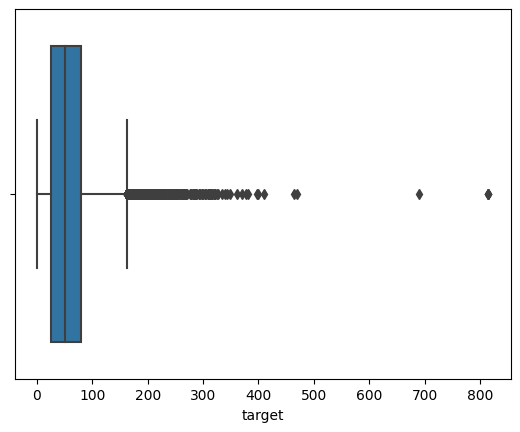

In [21]:
 sns.boxplot(data=train_ds, x='target')

<Axes: xlabel='precipitable_water_entire_atmosphere'>

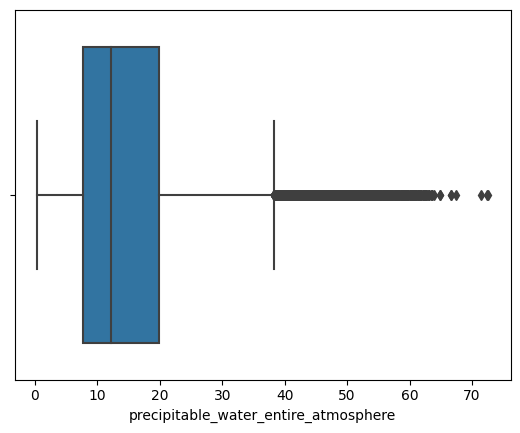

In [22]:
sns.boxplot(data=train_ds, x='precipitable_water_entire_atmosphere')

<Axes: xlabel='relative_humidity_2m_above_ground'>

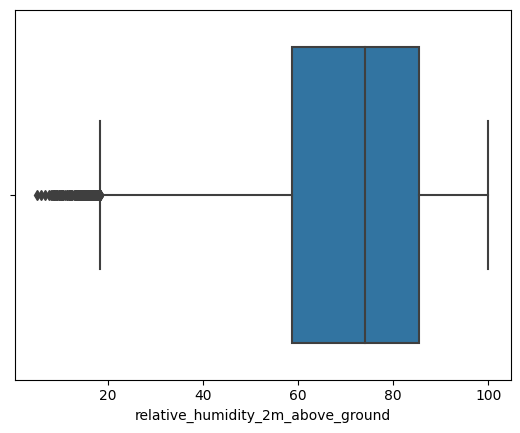

In [23]:
sns.boxplot(data=train_ds, x='relative_humidity_2m_above_ground')

In [24]:
# Identifying outliers in target

q1 = train_ds['target'].quantile(0.25)
q3 = train_ds['target'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = train_ds[(train_ds['target'] < lower_bound) | (train_ds['target'] > upper_bound)]

In [25]:
# Redefining outliers
train_ds_outliers_removed = train_ds[(train_ds['target'] >= lower_bound) & (train_ds['target'] <= upper_bound)]

<Axes: xlabel='target'>

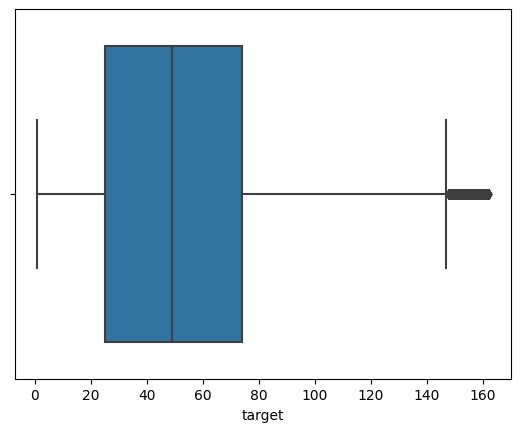

In [26]:
 sns.boxplot(data=train_ds_outliers_removed, x='target')

#### NB
- We will maintain the outliers since removing them will change the meaning of out data 

### Data Splitting

In [27]:
X = train_ds.drop("target", axis = 1)
X.head()

,Place_ID X Date,Date,Place_ID,target_min,target_max,target_variance,target_count,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,...,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle,L3_SO2_solar_zenith_angle,L3_CH4_CH4_column_volume_mixing_ratio_dry_air,L3_CH4_aerosol_height,L3_CH4_aerosol_optical_depth,L3_CH4_sensor_azimuth_angle,L3_CH4_sensor_zenith_angle,L3_CH4_solar_azimuth_angle,L3_CH4_solar_zenith_angle
0,010Q650 X 2020-01-02,2020-01-02,010Q650,23.0,53.0,769.50,92,11.000000,60.200001,0.00804,...,38.593017,-61.752587,22.363665,1793.793579,3227.855469,0.010579,74.481049,37.501499,-62.142639,22.545118
1,010Q650 X 2020-01-03,2020-01-03,010Q650,25.0,63.0,1319.85,91,14.600000,48.799999,0.00839,...,59.624912,-67.693509,28.614804,1789.960449,3384.226562,0.015104,75.630043,55.657486,-53.868134,19.293652
2,010Q650 X 2020-01-04,2020-01-04,010Q650,8.0,56.0,1181.96,96,16.400000,33.400002,0.00750,...,49.839714,-78.342701,34.296977,923.231949,1711.793613,0.016227,1.254703,13.849040,-69.098594,23.100630
3,010Q650 X 2020-01-05,2020-01-05,010Q650,10.0,55.0,1113.67,96,6.911948,21.300001,0.00391,...,29.181258,-73.896588,30.545446,923.231949,1711.793613,0.016227,1.254703,13.849040,-69.098594,23.100630
4,010Q650 X 2020-01-06,2020-01-06,010Q650,9.0,52.0,1164.82,95,13.900001,44.700001,0.00535,...,0.797294,-68.612480,26.899694,923.231949,1711.793613,0.016227,1.254703,13.849040,-69.098594,23.100630


In [28]:
Y = train_ds["target"]
Y.head()

0    38.0
1    39.0
2    24.0
3    49.0
4    21.0
Name: target, dtype: float64